In [69]:
import batoid
from copy import copy
from batoid.utils import normalized
from batoid.coating import SimpleCoating
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
batoid.datadir = '/home/bregeon/LSST/CCOB/batoid/batoid/data'
print('Version', batoid.__version__)
print('Module', batoid.__file__)

Version 0.1.0
Module /home/bregeon/data/Soft/miniconda3/envs/batoid/lib/python3.7/site-packages/batoid-0.1.0-py3.7-linux-x86_64.egg/batoid/__init__.py


In [88]:
fiducial_telescope = batoid.Optic.fromYaml("LSST_CCOB_r.yaml")
fiducial_telescope['L1_entrance'].forwardCoating = SimpleCoating(reflectivity=.0, transmissivity=1.0)

traceSplit        LSST            flux =         1.00000000   nphot =          1
traceSplit        LightSource     flux =         1.00000000   nphot =          1


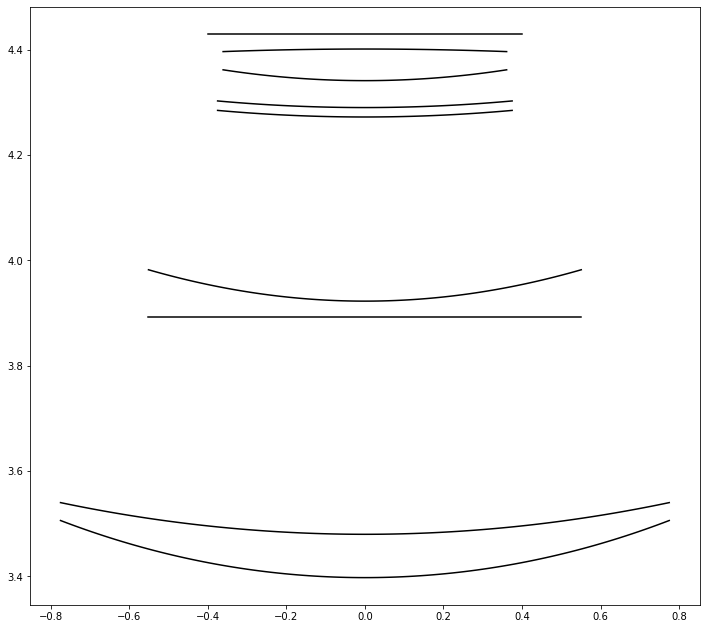

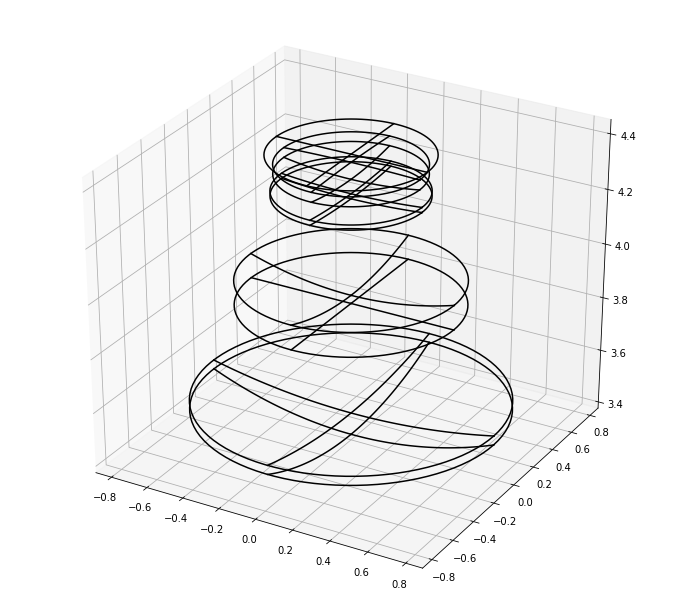

In [89]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')

c = '#ff7f00'
rays = []

for dx in range(0, 6, 1):
    p0 = np.array([dx/10., 0, 0])
    v = normalized(np.array([0, 0, 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(1)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

for dvx in range(0, 6, 1):
    p0 = np.array([-dvx/30., 0, 0])
    v = normalized(np.array([-dvx/50, 0., 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(1)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

#traceFull = fiducial_telescope.traceFull(batoid.RayVector(rays))
#batoid.drawTrace2d(ax1, traceFull, c=c)
#batoid.drawTrace3d(ax2, traceFull, c=c)    
r_vec = batoid.RayVector(rays[0:1])
traceSplit = fiducial_telescope.traceSplit(r_vec, minFlux=0.001, _verbose=True)
#print(traceSplit[0][0])
#print(traceSplit[1])

#batoid.drawTrace2d(ax1, traceSplit[0], c=c)
#batoid.drawTrace3d(ax2, traceSplit[1], c=c)    
